# Integration of Geomappy into Rioxarray

In [1]:
import rioxarray as rxr
import matplotlib.pyplot as plt
import geomappy as mp
import numpy as np
import os
import pyproj
import cartopy.crs as ccrs
os.chdir("../../../")

A 2D raster of water table depth (Fan et al., 2017).

In [2]:
r1 = rxr.open_rasterio("data/wtd.tif", masked=True)

Monthly mean discharges from 2019 from GloFAS

In [3]:
r2 = rxr.open_rasterio("data/dis_2019_monthlymeans_cropped_complete.nc", masked=True, decode_times=False).dis24[0]
r2 = r2.rio.write_crs(ccrs.epsg(3035))

## Outline on a world map

The first file covers Australia, while the second file covers Europe. Both have different projections. To see this at work, geomappy integrates two functions to explore the data: ``plot_world`` and ``plot_file``.

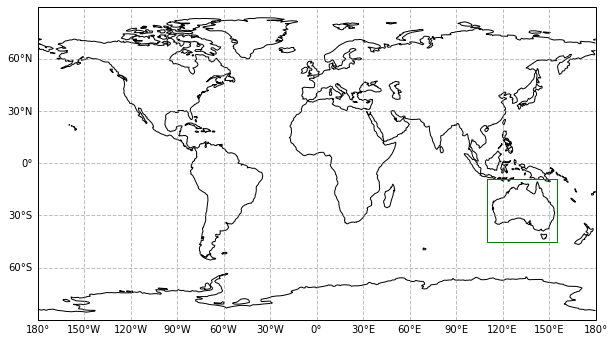

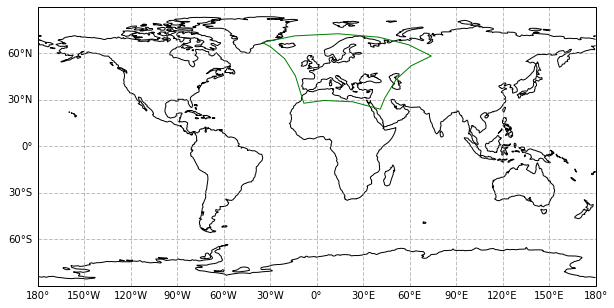

In [4]:
r1.plot_world()
r2.plot_world()
plt.show()

Here you can see that different data projections cause different shapes.

To focus specifically on the area of the file itself geomappy integrates the ``plot_file`` function, using the projection of the data.

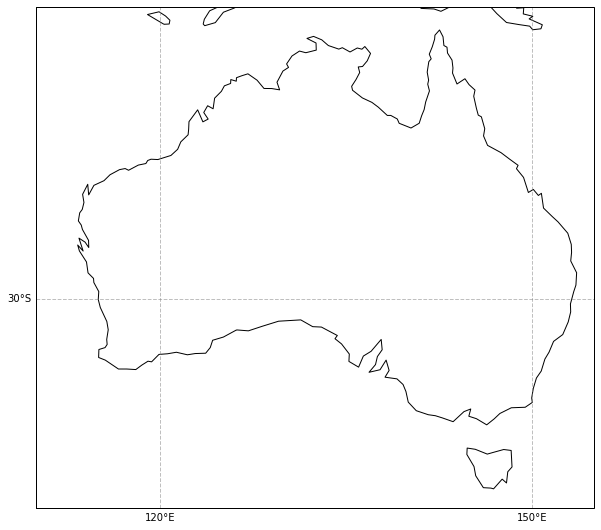

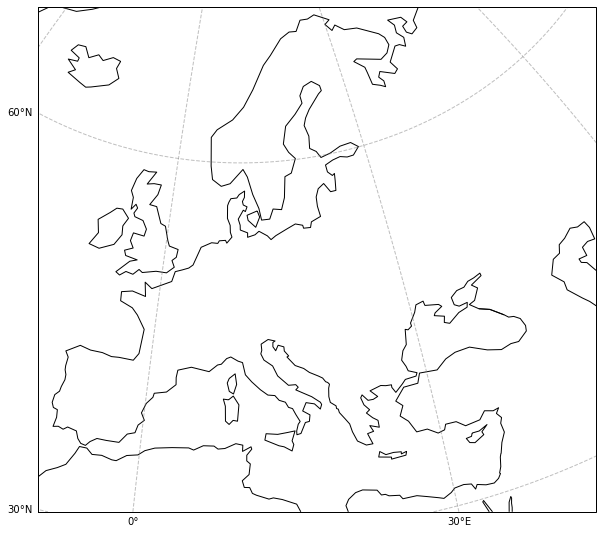

In [5]:
r1.plot_file()
r2.plot_file()
plt.show()

## Plotting the data

The geomappy plotting functionality (``plot_raster``) is directly integrated into rioxarray by loading geomappy. This results in the same figure as seen before:

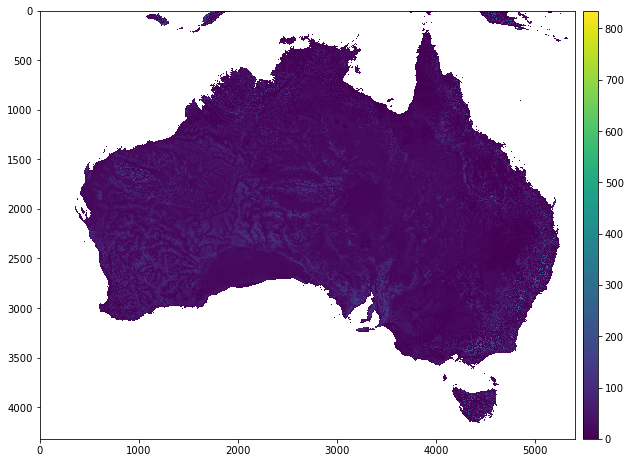

In [6]:
r1.plot_raster()
plt.show()

Including legends, bins and a cmap:

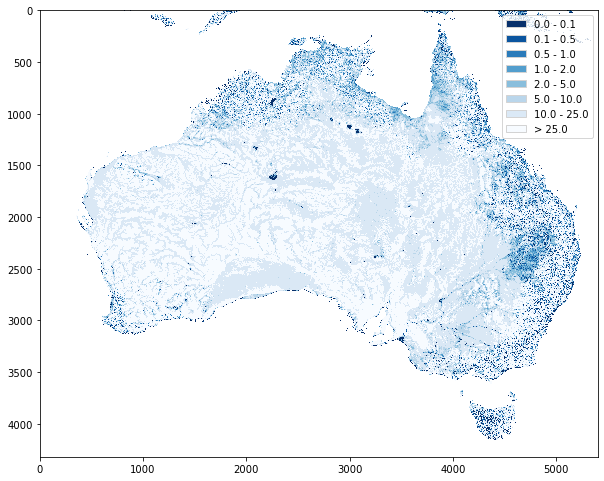

In [7]:
r1.plot_raster(bins=[0, 0.1, 0.5, 1, 2, 5, 10, 25], legend="legend", cmap="Blues_r")
plt.show()

Plotting the same image on a basemap from within the DataArray is much easier though, by taking advantage of the internal projection representation.

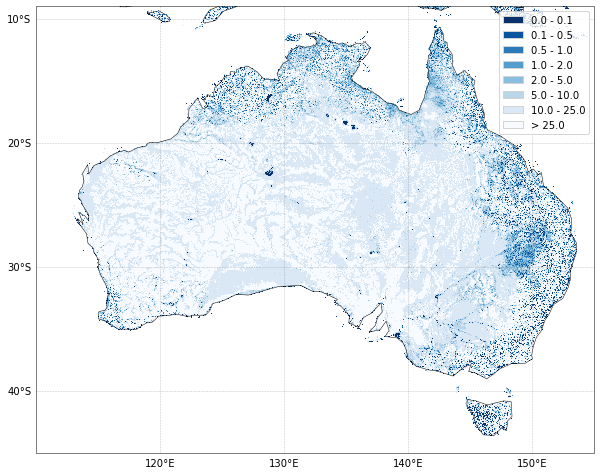

In [8]:
r1.plot_raster(bins=[0, 0.1, 0.5, 1, 2, 5, 10, 25], legend="legend", cmap="Blues_r", basemap=True, basemap_kwargs=dict(xticks=10, yticks=10, linewidth=0.5))
plt.show()

## Plotting on different projections

plotting on different projections is done with the projection keyword (if basemap is activated)

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fa2e8275160>)

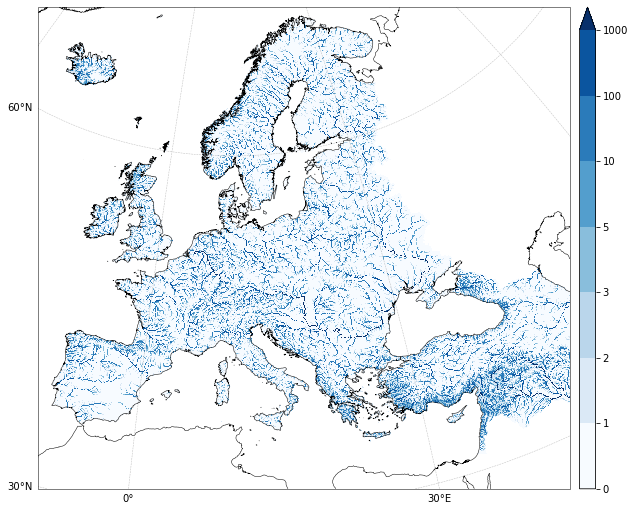

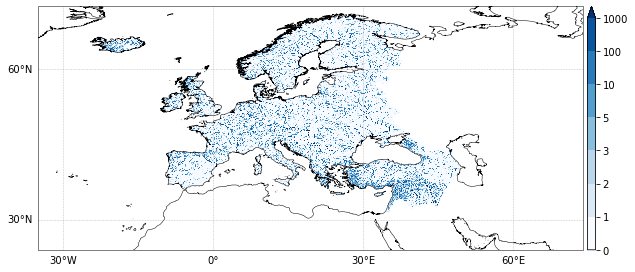

In [13]:
r2.plot_raster(basemap=True, basemap_kwargs=dict(resolution='10m', linewidth=0.5), bins=[0,1,2,3,5,10,100,1000], cmap="Blues")
r2.plot_raster(projection=ccrs.PlateCarree(), basemap=True, basemap_kwargs=dict(resolution='10m', linewidth=0.5), bins=[0,1,2,3,5,10,100,1000], cmap="Blues")
plt.show()

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fa2e804e070>)

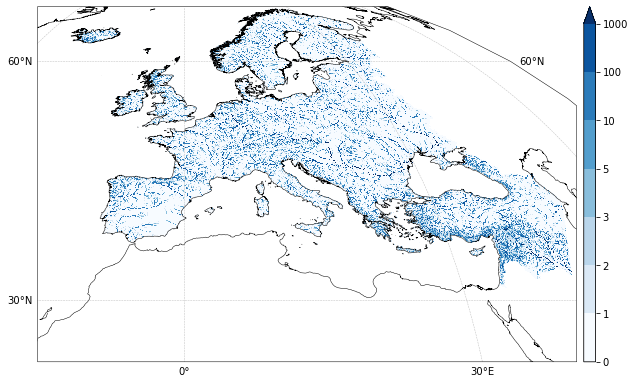

In [19]:
r2.plot_raster(projection=ccrs.Orthographic(), basemap=True, basemap_kwargs=dict(resolution='10m', linewidth=0.5), bins=[0,1,2,3,5,10,100,1000], cmap="Blues")
plt.show()

This introduces areas with nodata, which can be clipped by providing an extent:

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fa2e82b0dc0>)

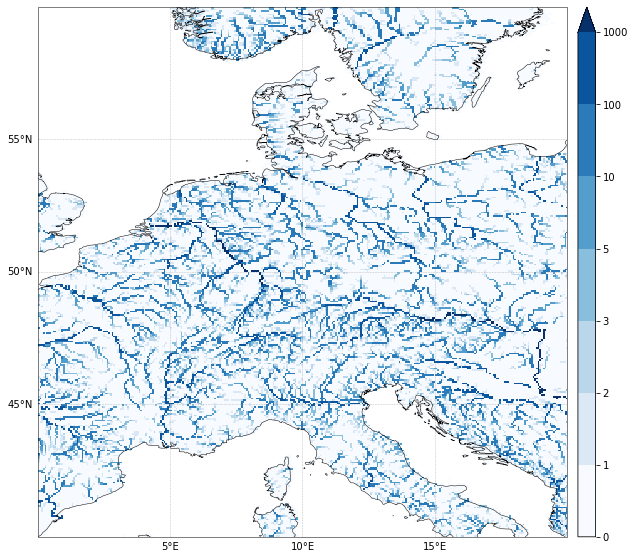

In [14]:
r2.plot_raster(extent=(0, 40, 20, 60), projection=ccrs.PlateCarree(), basemap=True, basemap_kwargs=dict(resolution='10m', linewidth=0.5, xticks=5, yticks=5), bins=[0,1,2,3,5,10,100,1000], cmap="Blues")
plt.show()

This step requires resampling, which can be an extremely costly operation if the array is big. Make sure that resolution and spatial dimensions are roughly matching the output requirements before doing this operation. Different resampling options might yield better results, depending on the situation. This can be done through the ``resampling`` parameter, which accepts ``rasterio`` resampling enums.